<a href="https://colab.research.google.com/github/JeanMichelDeveloper/Training/blob/main/Neural_network_with_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install opencv
!pip install opencv-contrib-python==4.6.0.66

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#import necessary libraries
import cv2
from sklearn.datasets import make_blobs
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import numpy
from matplotlib import pyplot as plt

Generate data

In [3]:
X_data, y_data = make_blobs(n_samples = 100,
           centers = 2,
           cluster_std = 5.1,
           random_state = 30)

In [4]:
#Process data
X = X_data.astype(numpy.float32)

encoder = OneHotEncoder(sparse = False, dtype=numpy.float32)

y = encoder.fit_transform(y_data.reshape(-1, 1))

Build an artificial neural network

In [11]:
#create model
model = cv2.ml.ANN_MLP_create()

number_of_inputs = 2
number_of_hidden_layers = 8
number_of_outputs = 2

model.setLayerSizes(numpy.array([number_of_inputs,
                                 number_of_hidden_layers,
                                 number_of_outputs]))

alpha = 2.5
beta = 1

model.setActivationFunction(cv2.ml.ANN_MLP_SIGMOID_SYM,
                            alpha,
                            beta)

model.setTrainMethod(cv2.ml.ANN_MLP_BACKPROP)

termination_mode = cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS
maximum_iterations = 1000
minimum_accuracy = 0.0001

model.setTermCriteria((termination_mode, 
                       maximum_iterations, 
                       minimum_accuracy))

#Train the model
model.train(X, cv2.ml.ROW_SAMPLE, y)

True

Visualize model results

In [12]:
#Use model to predict result
ret, prediction = model.predict(X)

accuracy_score(prediction.round(),y)

0.76

In [13]:
#create visualization function
def scatter(model, X, y):
  
  plt.scatter(X[:, 0], X[:, 1], c = y)

def visualize_results(model, X, y):

  min_x, max_x = X[:, 0].min() - 1, X[:, 0].max() - 1
  h = 0.02
  min_y, max_y = X[:, 1].min() - 1, X[:, 1].max() - 1

  new_x, new_y = numpy.meshgrid(numpy.arange(min_x, max_x, h),
                                numpy.arange(min_y, max_y, h))
  
  x_hypothesis = numpy.c_[new_x.ravel().astype(numpy.float32),
                          new_y.ravel().astype(numpy.float32)]
  
  ret, z = model.predict(x_hypothesis)

  z = numpy.argmax(z, axis = 1)
  z = z.reshape(new_x.shape)
  
  plt.contourf(new_x, new_y, z)

In [14]:
plt.rcParams["figure.figsize"] = (10, 5)

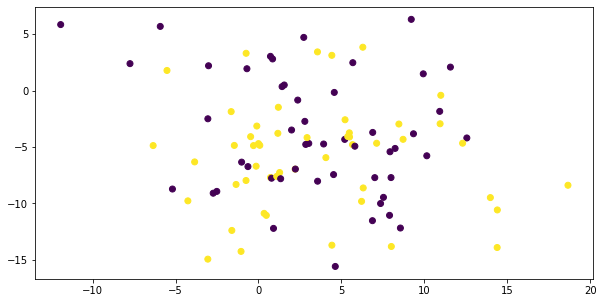

In [15]:
scatter(model, X, y_data)

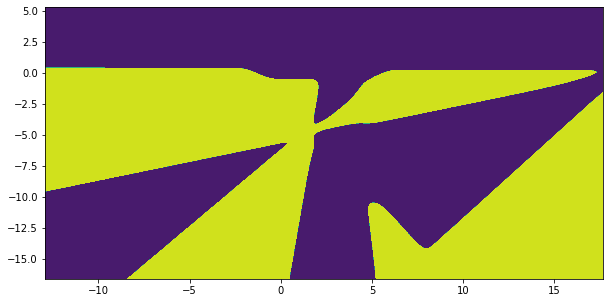

In [16]:
#Visualize results
visualize_results(model, X, y_data)